In [49]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

import utils
import importlib

In [1]:
#importlib.reload(utils)

In [51]:
PATH = "../data/google_wtts/"
!ls ../data/google_wtts/

backup	debug2	      models  train_big		 train_old
debug1	intermediate  test    train_big_cleaned


In [52]:
!ls ../data/google_wtts/models/

fibonachi_medians     lstm			 nanmedian_on_last_16
index_many_zeros.npy  median_daily_last_7_weeks  scores.csv
index_weekly.npy      nanmean_last_50		 test
info.csv	      nanmean_on_last_4		 weighted_median_092_decay
last_elem	      nanmedian_last_50


## train_big 

last 60 days go to test

In [143]:
train = pd.read_csv(PATH + "backup/train.csv")


index = pd.DataFrame(train.index, columns=["Index"])

index.to_csv(PATH + "backup/index.csv", index=None)

index.to_csv(PATH + "test/index.csv", index=None)
index.to_csv(PATH + "train_big/index.csv", index=None)

In [129]:
test = train[train.columns[-60:]]
train = train[train.columns[:-60]]

info = utils.ParseSitesNames(train)
train = train[train.columns[1:]]


train.to_csv(PATH + "train_big/train.csv", index=None)
info.to_csv(PATH + "train_big/info.csv", index=None)
test.to_csv(PATH + "train_big/test.csv", index=None)

## test

In [140]:
train = pd.read_csv(PATH + "backup/train.csv")

info = utils.ParseSitesNames(train)
train = train[train.columns[1:]]


train.to_csv(PATH + "test/train.csv", index=None)
info.to_csv(PATH + "test/info.csv", index=None)

## train_big_cleaned

In [16]:
train = pd.read_csv(PATH + "backup/train.csv")

test = train[train.columns[-60:]]
train = train[train.columns[:-60]]

info = utils.ParseSitesNames(train)
train = train[train.columns[1:]]

In [17]:
train = train.fillna(method='ffill', axis=1)

In [24]:
to_fill = np.expm1(np.nanmean(np.log1p(train.values), axis=1))

In [35]:
to_fill = pd.Series(to_fill)

In [36]:
train = train.T.fillna(to_fill).T

In [37]:
np.mean(np.log1p(train.values), axis=1)

array([2.95396855, 3.07874737, 1.4808149 , ..., 3.31495373, 2.44768489,
       2.87504885])

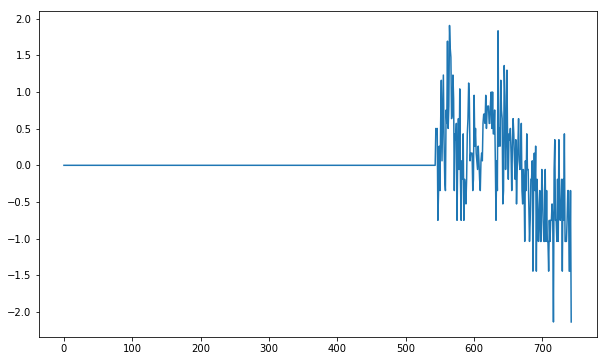

In [44]:
x = train.values[145058]
x = np.log1p(x)
x -= x.mean()
plt.plot(x)

In [47]:
! mkdir ../data/google_wtts/train_big_cleaned

In [48]:
train.to_csv(PATH + "train_big_cleaned/train.csv", index=None)
info.to_csv(PATH + "train_big_cleaned/info.csv", index=None)
test.to_csv(PATH + "train_big_cleaned/test.csv", index=None)

index = pd.DataFrame(train.index, columns=["Index"])
index.to_csv(PATH + "train_big_cleaned/index.csv", index=None)

# Check 

In [65]:
train, test, info, key = utils.ReadData("train_big")

In [68]:
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-07-03,2017-07-04,2017-07-05,2017-07-06,2017-07-07,2017-07-08,2017-07-09,2017-07-10,2017-07-11,2017-07-12
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,15.0,14.0,15.0,19.0,29.0,22.0,25.0,20.0,19.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,16.0,23.0,19.0,16.0,816.0,20.0,76.0,24.0,15.0,12.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,1.0,1.0,1.0,10.0,1.0,2.0,6.0,5.0,1.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,16.0,10.0,17.0,15.0,22.0,6.0,6.0,18.0,12.0,16.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,16.0,18.0,12.0,14.0,11.0,16.0,15.0,9.0,12.0


## debug1  (1% of all data)

In [121]:
train = pd.read_csv(PATH + "backup/train.csv")

new_size = 1500

train = train.sample(new_size)

index = pd.DataFrame(train.index, columns=["Index"])

test = train[train.columns[-60:]]
train = train[train.columns[:-60]]

info = utils.ParseSitesNames(train)
train = train[train.columns[1:]]

train.to_csv(PATH + "debug1/train.csv", index=None)
info.to_csv(PATH + "debug1/info.csv", index=None)
test.to_csv(PATH + "debug1/test.csv", index=None)
index.to_csv(PATH + "debug1/index.csv", index=None)

## debug2  (2% of all data)

In [125]:
train = pd.read_csv(PATH + "backup/train.csv")

new_size = 3000

train = train.sample(new_size)

index = pd.DataFrame(train.index, columns=["Index"])


test = train[train.columns[-60:]]
train = train[train.columns[:-60]]

info = utils.ParseSitesNames(train)
train = train[train.columns[1:]]

train.to_csv(PATH + "debug2/train.csv", index=None)
info.to_csv(PATH + "debug2/info.csv", index=None)
test.to_csv(PATH + "debug2/test.csv", index=None)
index.to_csv(PATH + "debug2/index.csv", index=None)

##  final_debug

In [ ]:
train = pd.read_csv("../data/google_wtts/train_big_cleaned/train.csv")

In [104]:
info = pd.read_csv("../data/google_wtts/train_big_cleaned/info.csv")
test = pd.read_csv("../data/google_wtts/train_big_cleaned/test.csv")


In [67]:
many_zeros = np.load('../data/google_wtts/models/index_many_zeros.npy')
index_weekly = np.load('../data/google_wtts/models/index_weekly.npy')

many_zeros = np.random.choice(many_zeros, 200, replace=False)
index_weekly = np.random.choice(index_weekly, 500, replace=False)

In [92]:
index_random = train.sample(1330).index

In [93]:
final_index = np.concatenate((many_zeros, index_weekly, index_random.values))

In [95]:
final_index = list(set(final_index))[:2000]
final_index = np.array(final_index)
final_index = np.sort(final_index)

In [103]:
train = train.iloc[final_index]

In [107]:
info = info.iloc[final_index]

In [108]:
test = test.iloc[final_index]

In [111]:
index = pd.DataFrame(final_index)

In [113]:
%mkdir ../data/google_wtts/debug3

In [ ]:
train.to_csv(PATH + "debug3/train.csv", index=None)
info.to_csv(PATH + "debug3/info.csv", index=None)
test.to_csv(PATH + "debug3/test.csv", index=None)
index.to_csv(PATH + "debug3/index.csv", index=None)

In [117]:
np.save("../data/google_wtts/zeros_index_for_score", many_zeros)

In [118]:
np.save("../data/google_wtts/weekly_index_for_score", index_weekly)